## Microlensing within SLSim
### Author: [Paras Sharma](https://github.com/timedilatesme)

### For running on Seawulf cluster
```bash
module load slurm
srun -J [job_name] -N 1 -p a100 --gpus=1 --pty bash
module load cuda120/toolkit/12.0
jupyter notebook --ip=0.0.0.0 --no-browser --port=8888
```
Then from jupyter notebook, under `Kernel` $\Rightarrow$ `Select Another kernel` $\Rightarrow$ `Existing Jupyter Server` $\Rightarrow$ `Enter the URL of the running Jupyter server`. Copy the URL from the terminal where you started the jupyter notebook and paste it here.

In [1]:
from slsim.Microlensing.magmap import MagnificationMap
from slsim.Microlensing.lightcurve import MicrolensingLightCurve
from matplotlib import pyplot as plt
import numpy as np
from slsim.Microlensing.lightcurvelensmodel import MicrolensingLightCurveFromLensModel
from slsim.Util.astro_util import theta_star_physical
from slsim.Plots.plot_functions import (
    plot_lightcurves_and_magmap,
    plot_magnification_map,
)

# might not need all of these
from astropy.cosmology import FlatLambdaCDM
from astropy.units import Quantity
from slsim.Lenses.lens_pop import LensPop

# from astropy import constants as const
from astropy import units as u

import slsim.Sources as sources
import slsim.Deflectors as deflectors
import slsim.Pipelines as pipelines
from slsim.Sources.SourceCatalogues.QuasarCatalog.quasar_pop import QuasarRate

### 1. Microlensing Map Generation

Generating magnification map ...
Done generating magnification map.


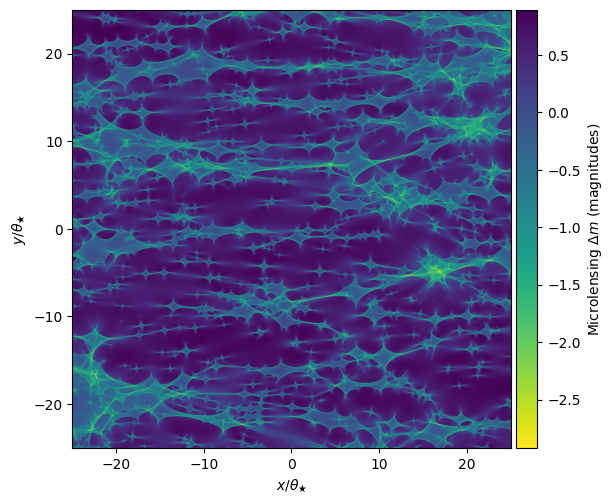

In [2]:
kwargs_MagnificationMap = {
    "kappa_tot": 0.34960889,
    "shear": 0.34860889,
    "kappa_star": 0.24,
    "theta_star": 4e-6,  # arcsec
    "center_x": 0,  # arcsec
    "center_y": 0,  # arcsec
    "half_length_x": 25 * 4e-6,  # arcsec
    "half_length_y": 25 * 4e-6,  # arcsec
    "mass_function": "kroupa",
    "m_solar": 1.0,
    "m_lower": 0.08,
    "m_upper": 100,
    "num_pixels_x": 1000,
    "num_pixels_y": 1000,
    "kwargs_IPM": {},
}
magmap = MagnificationMap(
    **kwargs_MagnificationMap,
)
plot_magnification_map(magmap, cmap="viridis_r", origin="lower")

### 2. Light Curve Extraction Using a Microlensing Map

#### 2.1 Gaussian Source

Generating magnification map ...
Done generating magnification map.


Text(0.5, 0.98, 'Gaussian Source Microlensing Lightcurves')

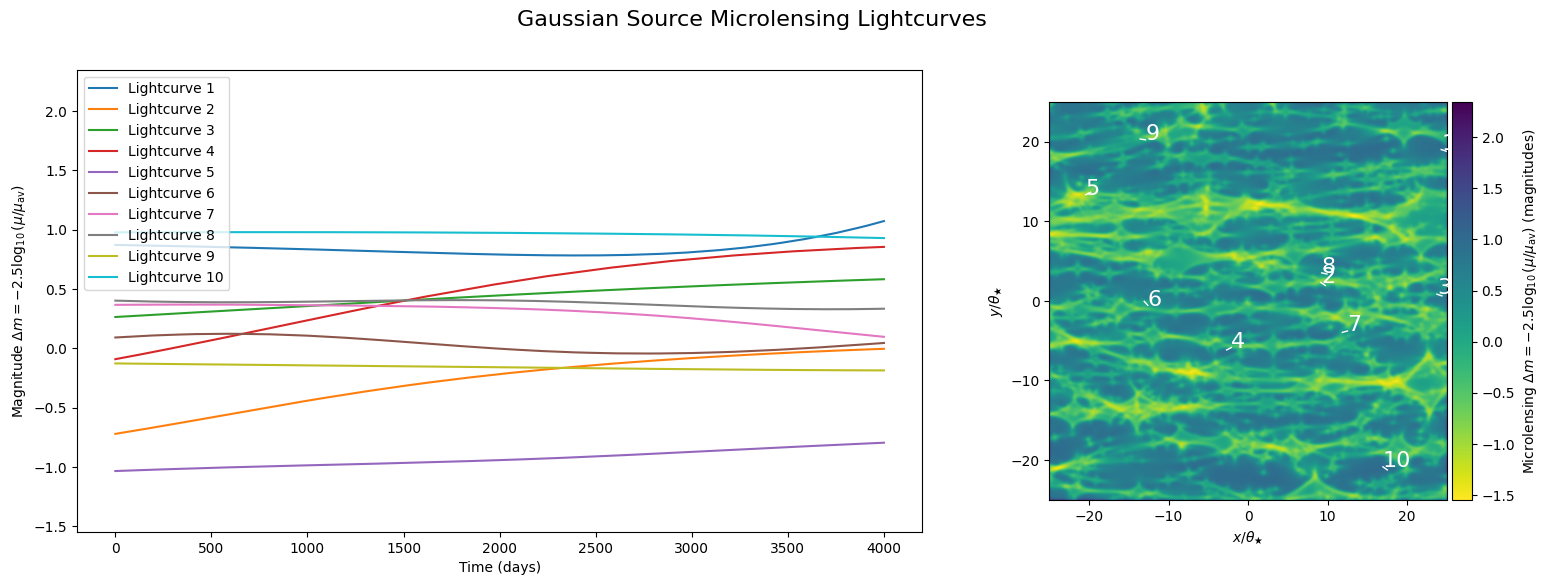

In [3]:
source_redshift = 2.467248566851947
deflector_redshift = 0.6688619611721243
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

theta_star, _, _ = theta_star_physical(
    z_lens=deflector_redshift,
    z_src=source_redshift,
    m=1,
    cosmo=cosmo,
)
theta_star = theta_star.to(u.arcsec).value

kwargs_MagnificationMap = {
    "kappa_tot": 0.37405285,
    "shear": 0.37623754,
    "kappa_star": 0.24271499,
    "theta_star": theta_star,  # arcsec
    "center_x": 0,  # arcsec
    "center_y": 0,  # arcsec
    "half_length_x": 25 * theta_star,  # arcsec
    "half_length_y": 25 * theta_star,  # arcsec
    "mass_function": "kroupa",
    "m_solar": 1.0,
    "m_lower": 0.08,
    "m_upper": 100,
    "num_pixels_x": 2000,
    "num_pixels_y": 2000,
}

magmap = MagnificationMap(
    **kwargs_MagnificationMap,
)


kwargs_gaussian_source_morphology = {
    "source_redshift": source_redshift,
    "cosmo": cosmo,
    "source_size": 8e-7,  # arcsec, this is the size of typical AGN Disk
}

ml_lc = MicrolensingLightCurve(
    magmap,
    time_duration=4000,
    point_source_morphology="gaussian",
    kwargs_source_morphology=kwargs_gaussian_source_morphology,
)

LCs, tracks, _ = ml_lc.generate_lightcurves(
    source_redshift=0.5,
    cosmo=cosmo,
    lightcurve_type="magnitude",
    effective_transverse_velocity=1000,  # km/s
    num_lightcurves=10,
)


ax = plot_lightcurves_and_magmap(
    convolved_map=ml_lc._convolved_map,
    lightcurves=LCs,
    time_duration_observer_frame=ml_lc._time_duration_observer_frame,
    tracks=tracks,
    magmap_instance=magmap,
    lightcurve_type="magnitude",
)

ax[0].figure.suptitle(
    "Gaussian Source Microlensing Lightcurves",
    fontsize=16,
)

#### 2.2 AGN Disk

Generating magnification map ...
Done generating magnification map.


/home/paras/.venv/lib/python3.13/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/paras/.venv/lib/python3.13/site-packages/astropy/units/quantity.py:658: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Text(0.5, 0.98, 'AGN Source Microlensing Lightcurves')

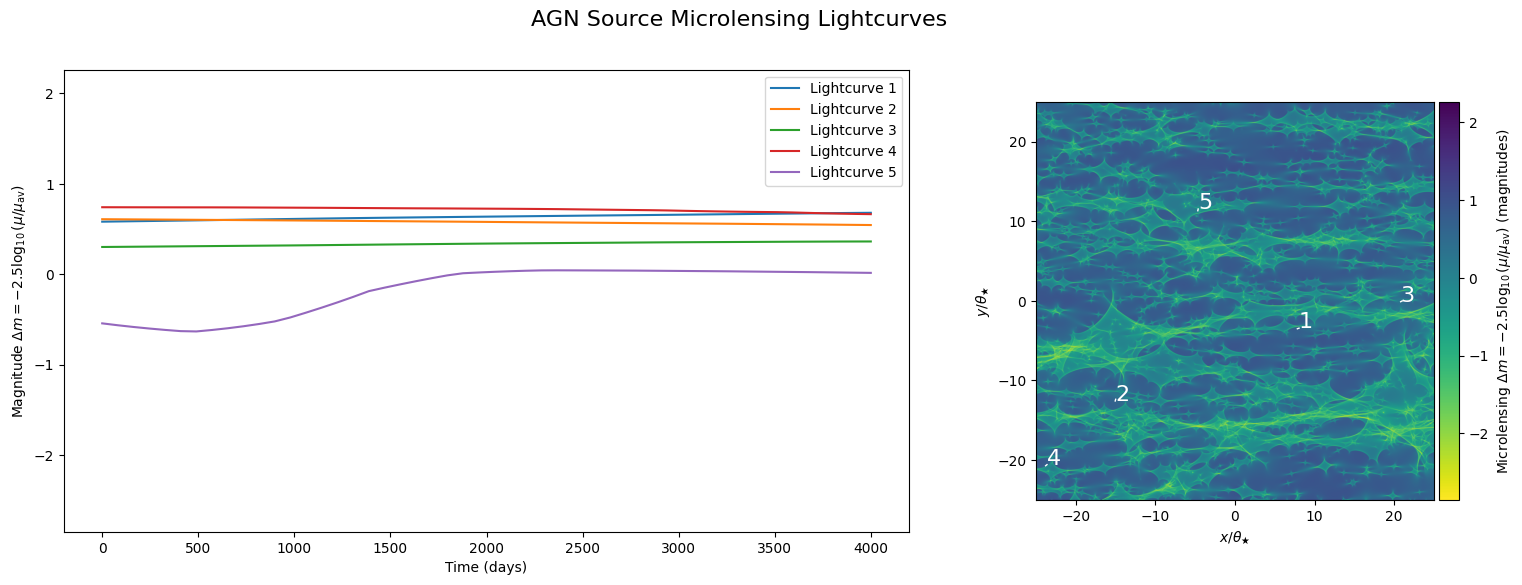

In [4]:
source_redshift = 2.467248566851947
deflector_redshift = 0.6688619611721243
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

theta_star, _, _ = theta_star_physical(
    z_lens=deflector_redshift,
    z_src=source_redshift,
    m=1,
    cosmo=cosmo,
)
theta_star = theta_star.to(u.arcsec).value

kwargs_MagnificationMap = {
    "kappa_tot": 0.37405285,
    "shear": 0.37623754,
    "kappa_star": 0.24271499,
    "theta_star": theta_star,  # arcsec
    "center_x": 0,  # arcsec
    "center_y": 0,  # arcsec
    "half_length_x": 25 * theta_star,  # arcsec
    "half_length_y": 25 * theta_star,  # arcsec
    "mass_function": "kroupa",
    "m_solar": 1.0,
    "m_lower": 0.08,
    "m_upper": 100,
    "num_pixels_x": 2000,
    "num_pixels_y": 2000,
}

magmap = MagnificationMap(
    **kwargs_MagnificationMap,
)

kwargs_agn_source_morphology = {
    "source_redshift": source_redshift,
    "cosmo": cosmo,
    "r_out": 1000,
    "r_resolution": 1000,
    "smbh_mass_exp": 8,
    "inclination_angle": 0,
    "black_hole_spin": 0,
    "observer_frame_wavelength_in_nm": 600,
    "eddington_ratio": 0.1,
}

ml_lc = MicrolensingLightCurve(
    magmap,
    time_duration=4000,
    point_source_morphology="agn",
    kwargs_source_morphology=kwargs_agn_source_morphology,
)

LCs, tracks, _ = ml_lc.generate_lightcurves(
    source_redshift=source_redshift,
    cosmo=cosmo,
    lightcurve_type="magnitude",
    effective_transverse_velocity=1000,  # km/s
    num_lightcurves=5,
)

ax = plot_lightcurves_and_magmap(
    convolved_map=ml_lc._convolved_map,
    lightcurves=LCs,
    time_duration_observer_frame=ml_lc._time_duration_observer_frame,
    tracks=tracks,
    magmap_instance=magmap,
    lightcurve_type="magnitude",
)
ax[0].figure.suptitle(
    "AGN Source Microlensing Lightcurves",
    fontsize=16,
)

### 3. Light Curve Extraction for images of point sources in the Lens Class

In [2]:
# define a cosmology
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

# define a sky area
galaxy_sky_area = Quantity(value=5, unit="deg2")
quasar_sky_area = Quantity(value=5, unit="deg2")
full_sky_area = Quantity(value=5, unit="deg2")


# define limits in the intrinsic deflector and source population (in addition
# to the skypy config
# file)
kwargs_deflector_cut = {"band": "i", "band_max": 28, "z_min": 0.01, "z_max": 2.5}
kwargs_source_cut = {"band": "i", "band_max": 26, "z_min": 0.001, "z_max": 5.0}

# generate galaxy population using skypy pipeline.
galaxy_simulation_pipeline = pipelines.SkyPyPipeline(
    skypy_config=None, sky_area=galaxy_sky_area, filters=None, cosmo=cosmo
)

# Initiate deflector population class
lens_galaxies = deflectors.AllLensGalaxies(
    red_galaxy_list=galaxy_simulation_pipeline.red_galaxies,
    blue_galaxy_list=galaxy_simulation_pipeline.blue_galaxies,
    kwargs_cut=kwargs_deflector_cut,
    kwargs_mass2light={},
    cosmo=cosmo,
    sky_area=galaxy_sky_area,
)

# Initiate QuasarRate class to generate quasar sample.
quasar_class = QuasarRate(
    cosmo=cosmo,
    sky_area=quasar_sky_area,
    noise=True,
    redshifts=np.linspace(0.001, 5.01, 100),  # these redshifts are provided
    # to match general slsim redshift range in skypy pipeline.
)
quasar_source = quasar_class.quasar_sample(m_min=15, m_max=30)

# Prepare dictionary of agn variability kwargs
variable_agn_kwarg_dict = {
    "length_of_light_curve": 500,
    "time_resolution": 1,
    "log_breakpoint_frequency": 1 / 20,
    "low_frequency_slope": 1,
    "high_frequency_slope": 3,
    "standard_deviation": 0.9,
}

kwargs_quasar = {
    "variability_model": "light_curve",
    "kwargs_variability": {"agn_lightcurve", "i", "r"},
    "agn_driving_variability_model": "bending_power_law",
    "agn_driving_kwargs_variability": variable_agn_kwarg_dict,
    "lightcurve_time": np.linspace(0, 1000, 500),
    "r_resolution": 500,
    "corona_height": 10,
}
# Initiate source population class.
source_quasar = sources.PointSources(
    quasar_source,
    cosmo=cosmo,
    sky_area=quasar_sky_area,
    kwargs_cut=kwargs_source_cut,
    point_source_type="quasar",
    point_source_kwargs=kwargs_quasar,
)

# Initiate LensPop class to generate lensed quasar pop.
quasar_lens_pop = LensPop(
    deflector_population=lens_galaxies,
    source_population=source_quasar,
    cosmo=cosmo,
    sky_area=full_sky_area,
)

# kwargs_lens_cuts = {}
# # drawing population
# quasar_lens_population = quasar_lens_pop.draw_population(
#     speed_factor=1000, kwargs_lens_cuts=kwargs_lens_cuts
# )

/home/paras/repos/self/slsim/slsim/Deflectors/DeflectorPopulation/all_lens_galaxies.py:56: UserWarning: Angular size is converted to arcsec because provided input_catalog_type is skypy. If this is not correct, please refer to the documentation of the class you are using
  red_galaxy_list = catalog_with_angular_size_in_arcsec(
/home/paras/repos/self/slsim/slsim/Deflectors/DeflectorPopulation/all_lens_galaxies.py:59: UserWarning: Angular size is converted to arcsec because provided input_catalog_type is skypy. If this is not correct, please refer to the documentation of the class you are using
  blue_galaxy_list = catalog_with_angular_size_in_arcsec(


In [15]:
# Select a random lens
kwargs_lens_cut = {
    "min_image_separation": 2,
    "max_image_separation": 10,
    "second_brightest_image_cut": {"i": 25},
}
rgb_band_list = ["i", "r", "g"]
lens_class = quasar_lens_pop.select_lens_at_random(**kwargs_lens_cut)

In [16]:
band = "i"
source = lens_class.source(0)
source_redshift = source.redshift
kappa_star_images, kappa_tot_images, shear_images, shear_angle_images = (
    lens_class._microlensing_parameters_for_image_positions_single_source(
        band=band, source_index=0
    )
)

# Einstein radius of a unit mass point lens in arcsec units.
theta_star, _, _ = theta_star_physical(
    z_lens=lens_class.deflector_redshift,
    z_src=lens_class.source_redshift_list[0],
    m=1,
    cosmo=cosmo,
)
theta_star = theta_star.to(u.arcsec).value
print("theta_star", theta_star, "arcsec")

theta_star 1.7774198079738705e-06 arcsec


In [17]:
print("kappa_star_images: ", kappa_star_images)
print("kappa_tot_images:  ", kappa_tot_images)
print("shear_images:      ", shear_images)
print("shear_angle_images:", shear_angle_images, "radians")
print("theta_star:       ", theta_star, "arcsec")
print("deflector_redshift: ", lens_class.deflector_redshift)
print("source_redshift:    ", lens_class.source_redshift_list[0])

kappa_star_images:  [0.03009588 0.46372238]
kappa_tot_images:   [0.17349743 0.62831431]
shear_images:       [0.13672522 0.60964664]
shear_angle_images: [1.67940774 1.4550285 ] radians
theta_star:        1.7774198079738705e-06 arcsec
deflector_redshift:  0.7730456420011345
source_redshift:     3.3564912370375004


#### 2.1 Gaussian Source

In [19]:
cosmology = lens_class.cosmo
kwargs_MagnificationMap = {
    "theta_star": theta_star,  # arcsec
    "center_x": 0,  # arcsec
    "center_y": 0,  # arcsec
    "half_length_x": 4 * theta_star,  # arcsec
    "half_length_y": 4 * theta_star,  # arcsec
    "mass_function": "kroupa",
    "m_solar": 1.0,
    "m_lower": 0.08,
    "m_upper": 100,
    "num_pixels_x": 500,
    "num_pixels_y": 500,
}
kwargs_gaussian_source_morphology = {
    "source_redshift": source_redshift,
    "cosmo": cosmology,
    "source_size": 8e-8,  # arcsec, this is the size of typical AGN Disk
}

ml_lc_lens = MicrolensingLightCurveFromLensModel(
    source_redshift=source_redshift,
    deflector_redshift=lens_class.deflector_redshift,
    kappa_star_images=kappa_star_images,
    kappa_tot_images=kappa_tot_images,
    shear_images=shear_images,
    shear_phi_angle_images=shear_angle_images,
    ra_lens=lens_class.deflector_position[0],
    dec_lens=lens_class.deflector_position[1],
    deflector_velocity_dispersion=lens_class.deflector_velocity_dispersion(),
    cosmology=cosmology,
    kwargs_MagnificationMap=kwargs_MagnificationMap,
    point_source_morphology="gaussian",
    kwargs_source_morphology=kwargs_gaussian_source_morphology,
)
LCs_lens = ml_lc_lens.generate_point_source_microlensing_magnitudes(
    time=np.linspace(0, 4000, 500),  # time in days
)

Generating magnification map ...
Done generating magnification map.
Generating magnification map ...
Done generating magnification map.


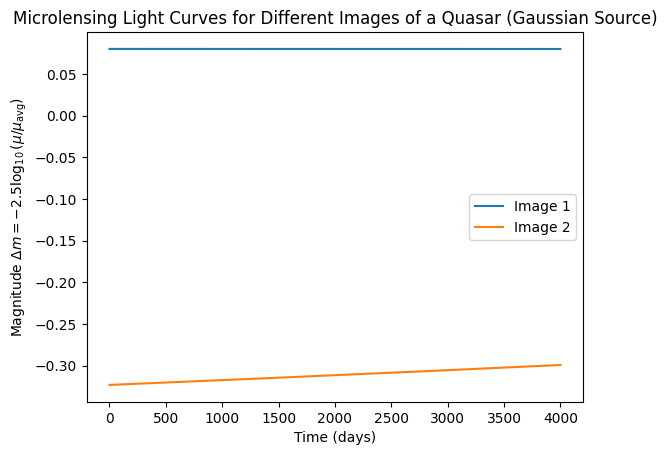

In [24]:
# plot the light curves
for i in range(len(LCs_lens)):
    plt.plot(np.linspace(0, 4000, 500), LCs_lens[i], label=f"Image {i+1}")
plt.xlabel("Time (days)")
plt.ylabel("Magnitude $\\Delta m = -2.5 \\log_{10} (\\mu/\\mu_{\\text{avg}})$")
plt.title(
    "Microlensing Light Curves for Different Images of a Quasar (Gaussian Source)"
)
plt.legend()

#### 2.2 AGN Disk

In [28]:
cosmology = lens_class.cosmo
kwargs_MagnificationMap = {
    "theta_star": theta_star,  # arcsec
    "center_x": 0,  # arcsec
    "center_y": 0,  # arcsec
    "half_length_x": 4 * theta_star,  # arcsec
    "half_length_y": 4 * theta_star,  # arcsec
    "mass_function": "kroupa",
    "m_solar": 1.0,
    "m_lower": 0.08,
    "m_upper": 100,
    "num_pixels_x": 500,
    "num_pixels_y": 500,
}

source_kwargs_agn_model = lens_class.source(0)._source.agn_class.kwargs_model

kwargs_agn_source_morphology = {
    "source_redshift": source_redshift,
    "cosmo": cosmology,
    "r_out": source_kwargs_agn_model["r_out"],
    "r_resolution": source_kwargs_agn_model["r_resolution"],
    "black_hole_mass_exponent": source_kwargs_agn_model["black_hole_mass_exponent"],
    "inclination_angle": source_kwargs_agn_model["inclination_angle"],
    "black_hole_spin": source_kwargs_agn_model["black_hole_spin"],
    "observer_frame_wavelength_in_nm": 600,
    "eddington_ratio": source_kwargs_agn_model["eddington_ratio"],
}

ml_lc_lens = MicrolensingLightCurveFromLensModel(
    source_redshift=source_redshift,
    deflector_redshift=lens_class.deflector_redshift,
    kappa_star_images=kappa_star_images,
    kappa_tot_images=kappa_tot_images,
    shear_images=shear_images,
    shear_phi_angle_images=shear_angle_images,
    ra_lens=lens_class.deflector_position[0],
    dec_lens=lens_class.deflector_position[1],
    deflector_velocity_dispersion=lens_class.deflector_velocity_dispersion(),
    cosmology=cosmology,
    kwargs_MagnificationMap=kwargs_MagnificationMap,
    point_source_morphology="agn",
    kwargs_source_morphology=kwargs_agn_source_morphology,
)
LCs_lens = ml_lc_lens.generate_point_source_microlensing_magnitudes(
    time=np.linspace(0, 4000, 500),  # time in days
)

Generating magnification map ...
Done generating magnification map.
Generating magnification map ...
Done generating magnification map.


/home/paras/.venv/lib/python3.13/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/paras/.venv/lib/python3.13/site-packages/astropy/units/quantity.py:658: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Text(0.5, 1.0, 'Microlensing Light Curves for Different Images of a Quasar (AGN Source)')

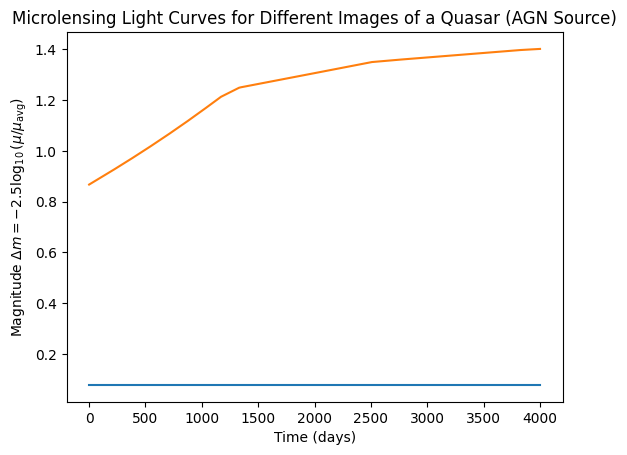

In [29]:
# plot the light curves
for i in range(len(LCs_lens)):
    plt.plot(np.linspace(0, 4000, 500), LCs_lens[i], label=f"Image {i+1}")
plt.xlabel("Time (days)")
plt.ylabel("Magnitude $\\Delta m = -2.5 \\log_{10} (\\mu/\\mu_{\\text{avg}})$")
plt.title("Microlensing Light Curves for Different Images of a Quasar (AGN Source)")

## EXTRA: Smaller Size Magnification Maps

Generating magnification map ...
Done generating magnification map.


Text(0.5, 0.98, 'Point Source Microlensing Lightcurves')

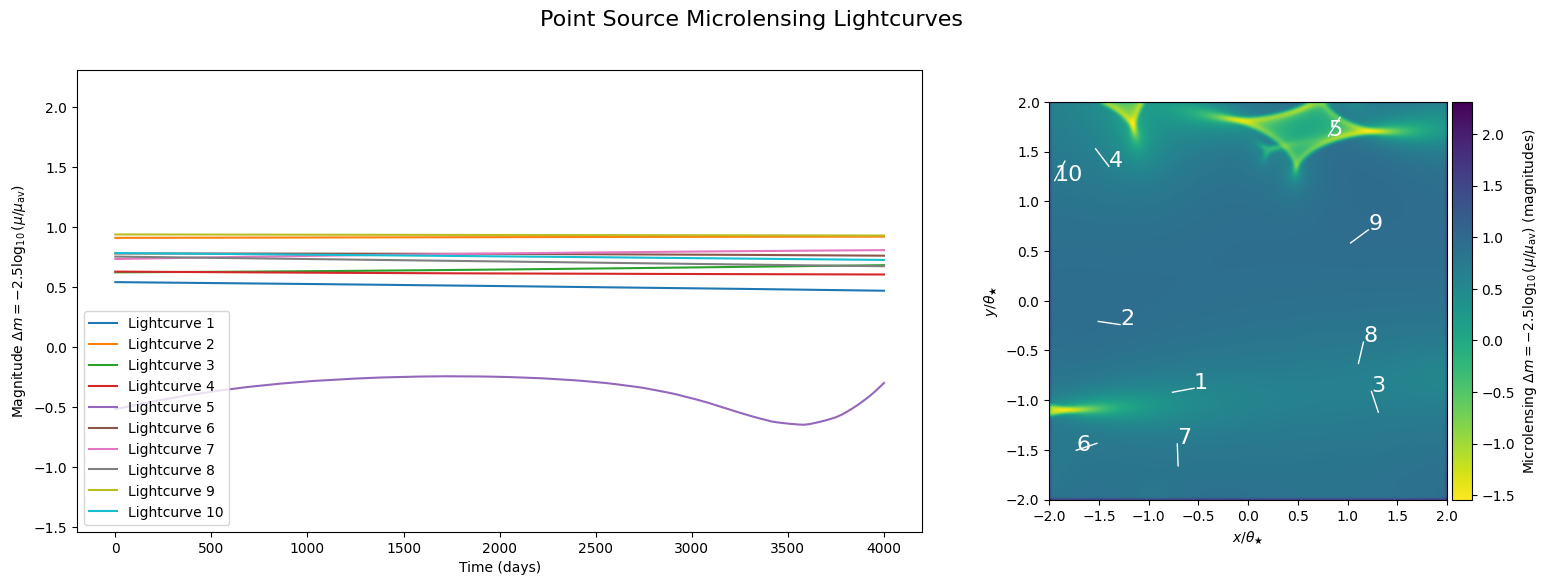

In [30]:
source_redshift = 2.467248566851947
deflector_redshift = 0.6688619611721243
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

theta_star, _, _ = theta_star_physical(
    z_lens=deflector_redshift,
    z_src=source_redshift,
    m=1,  # avg mass of the microlens in solar masses
    cosmo=cosmo,
)
theta_star = theta_star.to(u.arcsec).value

kwargs_MagnificationMap = {
    "kappa_tot": 0.37405285,
    "shear": 0.37623754,
    "kappa_star": 0.24271499,
    "theta_star": theta_star,  # arcsec
    "center_x": 0,  # arcsec
    "center_y": 0,  # arcsec
    "half_length_x": 2 * theta_star,  # arcsec
    "half_length_y": 2 * theta_star,  # arcsec
    "mass_function": "kroupa",
    "m_solar": 1.0,
    "m_lower": 0.08,
    "m_upper": 100,
    "num_pixels_x": 500,
    "num_pixels_y": 500,
}

magmap = MagnificationMap(
    **kwargs_MagnificationMap,
)


kwargs_gaussian_source_morphology = {
    "source_redshift": source_redshift,
    "cosmo": cosmo,
    "source_size": 8e-8,  # arcsec, this is the size of typical AGN Disk
}

ml_lc = MicrolensingLightCurve(
    magmap,
    time_duration=4000,
    point_source_morphology="gaussian",
    kwargs_source_morphology=kwargs_gaussian_source_morphology,
)

LCs, tracks, _ = ml_lc.generate_lightcurves(
    source_redshift=source_redshift,
    cosmo=cosmo,
    lightcurve_type="magnitude",
    effective_transverse_velocity=1000,  # km/s
    num_lightcurves=10,
)


ax = plot_lightcurves_and_magmap(
    convolved_map=ml_lc._convolved_map,
    lightcurves=LCs,
    tracks=tracks,
    time_duration_observer_frame=ml_lc._time_duration_observer_frame,
    magmap_instance=magmap,
    lightcurve_type="magnitude",
)

ax[0].figure.suptitle(
    "Point Source Microlensing Lightcurves",
    fontsize=16,
)

Generating magnification map ...
Done generating magnification map.


/home/paras/.venv/lib/python3.13/site-packages/astropy/units/quantity.py:658: RuntimeWarning: invalid value encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/paras/.venv/lib/python3.13/site-packages/astropy/units/quantity.py:658: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


Text(0.5, 0.98, 'AGN Source Microlensing Lightcurves')

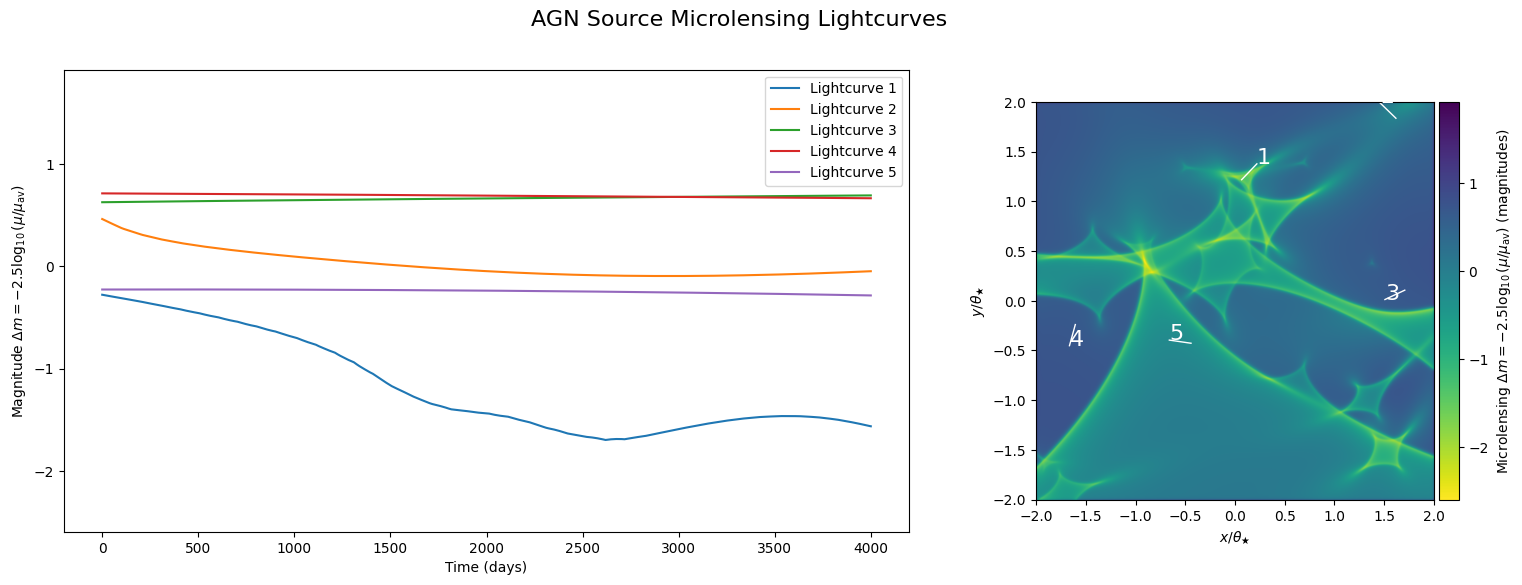

In [32]:
source_redshift = 2.467248566851947
deflector_redshift = 0.6688619611721243
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

theta_star, _, _ = theta_star_physical(
    z_lens=deflector_redshift,
    z_src=source_redshift,
    m=1,
    cosmo=cosmo,
)
theta_star = theta_star.to(u.arcsec).value

kwargs_MagnificationMap = {
    "kappa_tot": 0.37405285,
    "shear": 0.37623754,
    "kappa_star": 0.24271499,
    "theta_star": theta_star,  # arcsec
    "center_x": 0,  # arcsec
    "center_y": 0,  # arcsec
    "half_length_x": 2 * theta_star,  # arcsec
    "half_length_y": 2 * theta_star,  # arcsec
    "mass_function": "kroupa",
    "m_solar": 1.0,
    "m_lower": 0.08,
    "m_upper": 100,
    "num_pixels_x": 1000,
    "num_pixels_y": 1000,
}

magmap = MagnificationMap(
    **kwargs_MagnificationMap,
)

kwargs_agn_source_morphology = {
    "source_redshift": source_redshift,
    "cosmo": cosmo,
    "r_out": 1000,
    "r_resolution": 1000,
    "smbh_mass_exp": 8,
    "inclination_angle": 0,
    "black_hole_spin": 0,
    "eddington_ratio": 0.1,
    "observer_frame_wavelength_in_nm": 600,
}

ml_lc = MicrolensingLightCurve(
    magmap,
    time_duration=4000,
    point_source_morphology="agn",
    kwargs_source_morphology=kwargs_agn_source_morphology,
)

LCs, tracks, _ = ml_lc.generate_lightcurves(
    source_redshift=source_redshift,
    cosmo=cosmo,
    lightcurve_type="magnitude",
    effective_transverse_velocity=1000,  # km/s
    num_lightcurves=5,
)

ax = plot_lightcurves_and_magmap(
    convolved_map=ml_lc._convolved_map,
    lightcurves=LCs,
    tracks=tracks,
    time_duration_observer_frame=ml_lc._time_duration_observer_frame,
    magmap_instance=magmap,
    lightcurve_type="magnitude",
)
ax[0].figure.suptitle(
    "AGN Source Microlensing Lightcurves",
    fontsize=16,
)